In [1]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
from pathlib import Path
in_folder = Path("../data/")
sp.show_version()

SuPy version: 2023.7.3.dev62
-------------


In [2]:
# OHM. Sampledata Q* modelled with L↓ modelled using air temperature and relative humidity supplied in meteorological forcing file [Loridan et al., 2011]. Zenith angle not accounted for in albedo calculation.d
s_rc = in_folder / "sample_data/RunControl.nml"


df_state_init_s = sp.init_supy(s_rc)
# switch to NARP-based radiation scheme
df_state_init_s.netradiationmethod=3


2024-02-27 14:51:20,535 - SuPy - INFO - All cache cleared.


In [4]:
# Metdata
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)
s = "2012 07 1"
s2 = "2012 07 10"
e = "2012 07 31"

# # warm week 2012  to reduce time for test setup
df_forcing = df_forcing.loc[s2:e].iloc[1:]
# df_forcing2 = df_forcing.loc[s2:e].iloc[1:]

2024-02-27 14:51:51,572 - SuPy - INFO - All cache cleared.


In [36]:
df_state_init_s2 = df_state_init_s.copy()
# switch to EHC-based heat storage scheme
df_state_init_s2.storageheatmethod = 5
df_state_init_s3 = df_state_init_s2.copy()
df_state_init_s3.k_surf *= 5

df_state_init_s4 = df_state_init_s2.copy()
df_state_init_s4.cp_surf *= 50

In [37]:
dict_output={}
dict_state={
    'ohm':df_state_init_s,
    'ech':df_state_init_s2,
    'ech_k*5':df_state_init_s3,
    'ech_cp*2':df_state_init_s4

}
for cfg,df_state in dict_state.items():
    df_output, df_state_final = sp.run_supy(df_forcing, df_state)
    dict_output[cfg]=df_output

2024-02-27 15:00:02,178 - SuPy - INFO - ====================
2024-02-27 15:00:02,179 - SuPy - INFO - Simulation period:
2024-02-27 15:00:02,180 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-27 15:00:02,180 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-27 15:00:02,181 - SuPy - INFO - 
2024-02-27 15:00:02,181 - SuPy - INFO - No. of grids: 1
2024-02-27 15:00:02,182 - SuPy - INFO - SuPy is running in serial mode
2024-02-27 15:00:03,179 - SuPy - INFO - Execution time: 1.0 s
2024-02-27 15:00:03,180 - SuPy - INFO - ====================

2024-02-27 15:00:03,181 - SuPy - INFO - ====================
2024-02-27 15:00:03,182 - SuPy - INFO - Simulation period:
2024-02-27 15:00:03,182 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-27 15:00:03,183 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-27 15:00:03,183 - SuPy - INFO - 
2024-02-27 15:00:03,183 - SuPy - INFO - No. of grids: 1
2024-02-27 15:00:03,183 - SuPy - INFO - SuPy is running in serial mode
2024-02-27 15:00:04,558 - Su

<AxesSubplot: xlabel='datetime'>

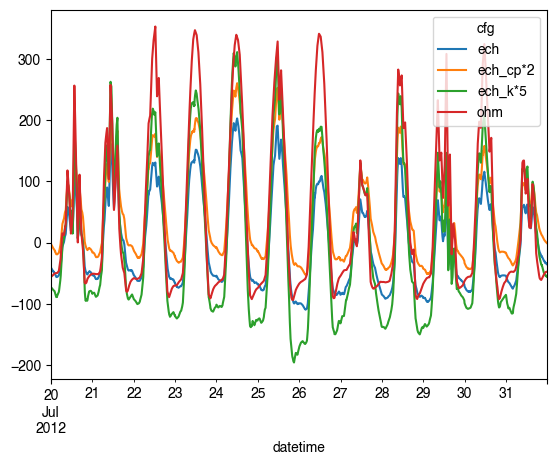

In [38]:
df_merge = pd.concat(dict_output, axis=1, names=["cfg"]).loc[1].stack("cfg")
df_merge.loc[:,'SUEWS'].loc[:,'QS'].unstack('cfg').loc['2012-7-20':].plot()

2024-02-27 15:31:27,303 - SuPy - INFO - ====================
2024-02-27 15:31:27,304 - SuPy - INFO - Simulation period:
2024-02-27 15:31:27,305 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-27 15:31:27,305 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-27 15:31:27,305 - SuPy - INFO - 
2024-02-27 15:31:27,306 - SuPy - INFO - No. of grids: 1
2024-02-27 15:31:27,306 - SuPy - INFO - SuPy is running in serial mode
2024-02-27 15:31:28,470 - SuPy - INFO - Execution time: 1.2 s
2024-02-27 15:31:28,470 - SuPy - INFO - ====================

2024-02-27 15:31:28,471 - SuPy - INFO - ====================
2024-02-27 15:31:28,471 - SuPy - INFO - Simulation period:
2024-02-27 15:31:28,471 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-27 15:31:28,471 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-27 15:31:28,471 - SuPy - INFO - 
2024-02-27 15:31:28,472 - SuPy - INFO - No. of grids: 1
2024-02-27 15:31:28,472 - SuPy - INFO - SuPy is running in serial mode
2024-02-27 15:31:29,537 - Su

<AxesSubplot: xlabel='datetime'>

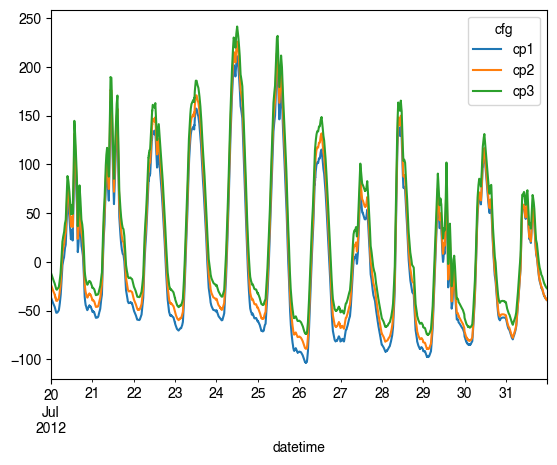

In [40]:
# different heat capacity
df_state_init_cp = df_state_init_s2.copy()
df_state_init_cp1 = df_state_init_cp.copy()
df_state_init_cp1.cp_surf *= 2
df_state_init_cp2 = df_state_init_cp.copy()
df_state_init_cp2.cp_surf *= 5
df_state_init_cp3 = df_state_init_cp.copy()
df_state_init_cp3.cp_surf *= 10

dict_output_cp={}
dict_state_cp={
    'cp1':df_state_init_cp1,
    'cp2':df_state_init_cp2,
    'cp3':df_state_init_cp3
}
for cfg,df_state in dict_state_cp.items():
    df_output, df_state_final = sp.run_supy(df_forcing, df_state)
    dict_output_cp[cfg]=df_output

df_merge_cp = pd.concat(dict_output_cp, axis=1, names=["cfg"]).loc[1].stack("cfg")
df_merge_cp.loc[:,'SUEWS'].loc[:,'QS'].unstack('cfg').loc['2012-7-20':].plot()

2024-02-27 15:33:04,052 - SuPy - INFO - ====================
2024-02-27 15:33:04,053 - SuPy - INFO - Simulation period:
2024-02-27 15:33:04,054 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-27 15:33:04,054 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-27 15:33:04,054 - SuPy - INFO - 
2024-02-27 15:33:04,055 - SuPy - INFO - No. of grids: 1
2024-02-27 15:33:04,055 - SuPy - INFO - SuPy is running in serial mode


2024-02-27 15:33:05,461 - SuPy - INFO - Execution time: 1.4 s
2024-02-27 15:33:05,461 - SuPy - INFO - ====================

2024-02-27 15:33:05,462 - SuPy - INFO - ====================
2024-02-27 15:33:05,463 - SuPy - INFO - Simulation period:
2024-02-27 15:33:05,463 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-27 15:33:05,463 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-27 15:33:05,464 - SuPy - INFO - 
2024-02-27 15:33:05,464 - SuPy - INFO - No. of grids: 1
2024-02-27 15:33:05,464 - SuPy - INFO - SuPy is running in serial mode
2024-02-27 15:33:07,007 - SuPy - INFO - Execution time: 1.5 s
2024-02-27 15:33:07,007 - SuPy - INFO - ====================

2024-02-27 15:33:07,008 - SuPy - INFO - ====================
2024-02-27 15:33:07,008 - SuPy - INFO - Simulation period:
2024-02-27 15:33:07,008 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-27 15:33:07,008 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-27 15:33:07,009 - SuPy - INFO - 
2024-02-27 15:33:07,009 - SuPy 

<AxesSubplot: xlabel='datetime'>

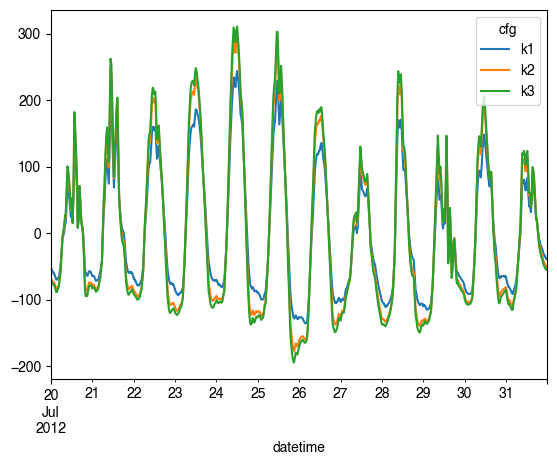

In [42]:
# different heat conductivity
df_state_init_k = df_state_init_s2.copy()
df_state_init_k1 = df_state_init_k.copy()
df_state_init_k1.k_surf *= 2
df_state_init_k2 = df_state_init_k.copy()
df_state_init_k2.k_surf *= 4
df_state_init_k3 = df_state_init_k.copy()
df_state_init_k3.k_surf *= 5

dict_output_k={}
dict_state_k={
    'k1':df_state_init_k1,
    'k2':df_state_init_k2,
    'k3':df_state_init_k3
}
for cfg,df_state in dict_state_k.items():
    df_output, df_state_final = sp.run_supy(df_forcing, df_state)
    dict_output_k[cfg]=df_output

df_merge_k = pd.concat(dict_output_k, axis=1, names=["cfg"]).loc[1].stack("cfg")
df_merge_k.loc[:,'SUEWS'].loc[:,'QS'].unstack('cfg').loc['2012-7-20':].plot()